# 선형회귀

현대 중공업과 계약을 맺어 일부 선박에 대한 예측 모델을 구축하게됐습니다. 현대 중공업은 세계 최대의 선박 제조업체 중 하나로 유람선을 제작하고 있습니다.
당신은 선박에 필요한 선원 수를 정확하게 예측할 수 있도록 울산에있는 본사에 도착했습니다.
그들은 현재 새로운 선박을 건조하고 있으며 예측 모델을 만들고, 이를 사용하여 선박에 필요한 승무원 수를 예측하기를 원합니다.

지금까지의 데이터는 다음과 같습니다.

    Description: Measurements of ship size, capacity, crew, and age for 158 cruise
    ships.


    Variables/Columns
    Ship Name     1-20
    Cruise Line   21-40
    Age (as of 2013)   46-48
    Tonnage (1000s of tons)   50-56
    passengers (100s)   58-64
    Length (100s of feet)  66-72
    Cabins  (100s)   74-80
    Passenger Density   82-88
    Crew  (100s)   90-96
    
위 데이터는 "cruise_ship_info.csv"라는 csv 파일에 저장됩니다. 귀하의 임무는 향후 선박에 필요한 선원 수를 예측하는 데 도움이되는 회귀 모델을 만드는 것입니다. 고객은 또한 특정 크루즈 라인이 허용되는 승무원 수에 차이가 있음을 발견 했으므로 분석에 포함하는 것이 가장 중요한 기능이라고 언급했습니다!

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler, OneHotEncoder
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("./data/cruise_ship_info_example.csv")
df = df.iloc[:,1:]

In [63]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,NaN
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,NaN
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Ship_name          158 non-null    object 
 1   Cruise_line        158 non-null    object 
 2   Age                158 non-null    int64  
 3   Tonnage            158 non-null    float64
 4   passengers         158 non-null    float64
 5   length             158 non-null    float64
 6   cabins             158 non-null    float64
 7   passenger_density  158 non-null    float64
 8   crew               110 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 11.2+ KB


In [65]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,110.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.728909
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.563549
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.200000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.630000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,10.000000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,19.100000


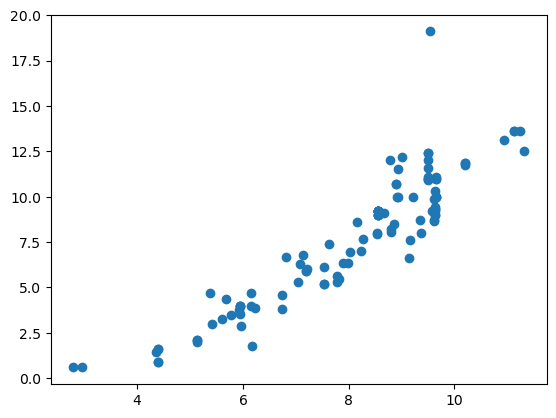

In [66]:
plt.figure
plt.scatter(x=df["length"],y=df["crew"])

In [67]:
ohe = OneHotEncoder()

line_array = np.array(df["Cruise_line"])
line_array = np.reshape(line_array, (-1, 1))
line = ohe.fit_transform(line_array)
ohe_line_df = pd.DataFrame(line.toarray(), columns=ohe.get_feature_names_out())
# ohe.get_feature_names_out()

In [68]:
ohe_line_df.head()

,x0_Azamara,x0_Carnival,x0_Celebrity,x0_Costa,x0_Crystal,x0_Cunard,x0_Disney,x0_Holland_American,x0_MSC,x0_Norwegian,x0_Oceania,x0_Orient,x0_P&O,x0_Princess,x0_Regent_Seven_Seas,x0_Royal_Caribbean,x0_Seabourn,x0_Silversea,x0_Star,x0_Windstar
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
df = pd.concat([df,ohe_line_df], axis=1)

In [70]:
df.columns

Index(['Ship_name', 'Cruise_line', 'Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'crew', 'x0_Azamara', 'x0_Carnival',
       'x0_Celebrity', 'x0_Costa', 'x0_Crystal', 'x0_Cunard', 'x0_Disney',
       'x0_Holland_American', 'x0_MSC', 'x0_Norwegian', 'x0_Oceania',
       'x0_Orient', 'x0_P&O', 'x0_Princess', 'x0_Regent_Seven_Seas',
       'x0_Royal_Caribbean', 'x0_Seabourn', 'x0_Silversea', 'x0_Star',
       'x0_Windstar'],
      dtype='object')

In [71]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew,x0_Azamara,...,x0_Oceania,x0_Orient,x0_P&O,x0_Princess,x0_Regent_Seven_Seas,x0_Royal_Caribbean,x0_Seabourn,x0_Silversea,x0_Star,x0_Windstar
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,NaN,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
df.drop(["Ship_name","Cruise_line"], axis=1 , inplace=True)
df.head()


,Age,Tonnage,passengers,length,cabins,passenger_density,crew,x0_Azamara,x0_Carnival,x0_Celebrity,...,x0_Oceania,x0_Orient,x0_P&O,x0_Princess,x0_Regent_Seven_Seas,x0_Royal_Caribbean,x0_Seabourn,x0_Silversea,x0_Star,x0_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,NaN,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,26,47.262,14.86,7.22,7.43,31.80,NaN,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
columns = ['Age', 'Tonnage', 'passengers', 'length',
       'cabins', 'passenger_density', 'x0_Azamara', 'x0_Carnival',
       'x0_Celebrity', 'x0_Costa', 'x0_Crystal', 'x0_Cunard', 'x0_Disney',
       'x0_Holland_American', 'x0_MSC', 'x0_Norwegian', 'x0_Oceania',
       'x0_Orient', 'x0_P&O', 'x0_Princess', 'x0_Regent_Seven_Seas',
       'x0_Royal_Caribbean', 'x0_Seabourn', 'x0_Silversea', 'x0_Star',
       'x0_Windstar', 'x0_Azamara', 'x0_Carnival', 'x0_Celebrity', 'x0_Costa',
       'x0_Crystal', 'x0_Cunard', 'x0_Disney', 'x0_Holland_American', 'x0_MSC',
       'x0_Norwegian', 'x0_Oceania', 'x0_Orient', 'x0_P&O', 'x0_Princess',
       'x0_Regent_Seven_Seas', 'x0_Royal_Caribbean', 'x0_Seabourn',
       'x0_Silversea', 'x0_Star', 'x0_Windstar']
x = df[df["crew"].isna()==False][columns]
y = df[df["crew"].isna()==False]["crew"]

In [74]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=1)

In [75]:
scale_col = x_train.columns[:6].tolist()

In [132]:
ss = MinMaxScaler()
scaled_train = ss.fit_transform(x_train[scale_col])
scaled_test = ss.transform(x_test[scale_col])

In [133]:
len(scaled_train), len(scaled_test)

(82, 28)

In [134]:
scaled_train = pd.DataFrame(scaled_train, columns=scale_col)
scaled_test = pd.DataFrame(scaled_test, columns=scale_col)

In [135]:
scaled_train = pd.concat(
    [scaled_train, x_train.iloc[:,6:].reset_index(drop=True)],axis=1
)
scaled_test = pd.concat(
    [scaled_test, x_test.iloc[:, 6:].reset_index(drop=True)], axis=1
)

In [136]:
scaled_train.shape, scaled_test.shape

((82, 46), (28, 46))

In [137]:
lr = LinearRegression()
lr.fit(scaled_train,y_train)

LinearRegression()

In [138]:
lr.score(scaled_test,y_test)

0.9553278400070859

In [ ]:
mean_squared_error(y_test, pred)

In [139]:
x = sm.add_constant(scaled_train)

In [140]:
model = sm.OLS(y_train.reset_index(drop=True),x).fit().summary()
model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crew   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     37.46
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           1.78e-26
Time:                        12:31:14   Log-Likelihood:                -103.70
No. Observations:                  82   AIC:                             259.4
Df Residuals:                      56   BIC:                             322.0
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.1035      0.940     -0.110      0.913      -1.987       1.780
Age                      0.5841      1.441      0.405      0.687      -2.303       3.471
Tonnage                  3.7170      5.464      0.680      0.499      -7.229      14.663
passengers              -4.8859      4.771     -1.024      0.310     -14.443       4.671
length                   4.1834      1.917      2.182      0.033       0.343       8.024
cabins                  12.7538      5.632      2.265      0.027       1.473      24.035
passenger_density       -0.9835      1.533     -0.642      0.524      -4.054       2.087
x0_Azamara               0.1082      0.560      0.193      0.848      -1.014       1.231
x0_Carnival              0.0452      0.262      0.172      0.864      -0.480       0.571
x0_Celebrity             0.2038      0.230      0.886      0.379      -0.257       0.665
x0_Costa                -0.3699      0.217     -1.704      0.094      -0.805       0.065
x0_Crystal               0.3011      0.594      0.507      0.614      -0.889       1.491
x0_Cunard               -0.2739      0.729     -0.376      0.708      -1.734       1.186
x0_Disney                0.2291      0.537      0.427      0.671      -0.847       1.305
x0_Holland_American     -0.3155      0.239     -1.321      0.192      -0.794       0.163
x0_MSC                  -0.3030      0.373     -0.812      0.420      -1.050       0.444
x0_Norwegian            -0.2104      0.283     -0.744      0.460      -0.777       0.356
x0_Oceania               0.3365      0.324      1.038      0.304      -0.313       0.986
x0_Orient               -0.4261      0.673     -0.633      0.529      -1.774       0.922
x0_P&O                  -0.1454      0.284     -0.513      0.610      -0.714       0.423
x0_Princess             -0.2846      0.227     -1.256      0.214      -0.738       0.169
x0_Regent_Seven_Seas     0.3508      0.402      0.872      0.387      -0.455       1.157
x0_Royal_Caribbean      -0.8538      0.346     -2.466      0.017      -1.547      -0.160
x0_Seabourn              0.3164      0.426      0.743      0.461      -0.537       1.170
x0_Silversea             0.3053      0.476      0.641      0.524      -0.648       1.259
x0_Star                  1.0032      0.380      2.639      0.011       0.242       1.765
x0_Windstar             -0.1206      0.318     -0.379      0.706      -0.758       0.517
x0_Azamara               0.1082      0.560      0.193      0.848      -1.014       1.231
x0_Carnival              0.0452      0.262      0.172      0.864      -0.480       0.571
x0_Celebrity             0.2038      0.230      0.886      0.379      -0.257       0.665
x0_Costa                -0.3699      0.217     -1.704      0.094      -0.805       0.065
x0_Crystal               0.3011      0.594      0.507    

In [142]:
new_x = x.drop("Age",axis=1)
new_x = sm.add_constant(new_x)
sm.OLS(y_train.reset_index(drop=True),new_x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crew   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     39.59
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           3.02e-27
Time:                        12:31:41   Log-Likelihood:                -103.83
No. Observations:                  82   AIC:                             257.7
Df Residuals:                      57   BIC:                             317.8
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1616      0.670      0.241      0.810      -1.180       1.504
Tonnage                  3.1198      5.223      0.597      0.553      -7.339      13.578
passengers              -5.0879      4.710     -1.080      0.285     -14.519       4.343
length                   4.2974      1.882      2.283      0.026       0.528       8.067
cabins                  13.0633      5.538      2.359      0.022       1.973      24.154
passenger_density       -1.0229      1.518     -0.674      0.503      -4.063       2.017
x0_Azamara               0.0096      0.501      0.019      0.985      -0.994       1.013
x0_Carnival              0.0580      0.258      0.224      0.823      -0.460       0.575
x0_Celebrity             0.2025      0.228      0.887      0.379      -0.255       0.660
x0_Costa                -0.3587      0.214     -1.679      0.099      -0.787       0.069
x0_Crystal               0.2903      0.589      0.493      0.624      -0.890       1.470
x0_Cunard               -0.0904      0.567     -0.159      0.874      -1.225       1.045
x0_Disney                0.2500      0.530      0.471      0.639      -0.812       1.312
x0_Holland_American     -0.3106      0.237     -1.312      0.195      -0.785       0.164
x0_MSC                  -0.3533      0.349     -1.012      0.316      -1.053       0.346
x0_Norwegian            -0.2091      0.281     -0.745      0.459      -0.771       0.353
x0_Oceania               0.2962      0.306      0.967      0.338      -0.317       0.910
x0_Orient               -0.2645      0.538     -0.492      0.625      -1.342       0.813
x0_P&O                  -0.1406      0.281     -0.500      0.619      -0.704       0.423
x0_Princess             -0.2589      0.216     -1.199      0.236      -0.691       0.174
x0_Regent_Seven_Seas     0.3446      0.399      0.863      0.391      -0.455       1.144
x0_Royal_Caribbean      -0.8133      0.329     -2.472      0.016      -1.472      -0.154
x0_Seabourn              0.3348      0.420      0.797      0.429      -0.507       1.177
x0_Silversea             0.2899      0.471      0.615      0.541      -0.653       1.233
x0_Star                  1.0018      0.377      2.655      0.010       0.246       1.757
x0_Windstar             -0.1168      0.316     -0.370      0.713      -0.749       0.516
x0_Azamara               0.0096      0.501      0.019      0.985      -0.994       1.013
x0_Carnival              0.0580      0.258      0.224      0.823      -0.460       0.575
x0_Celebrity             0.2025      0.228      0.887      0.379      -0.255       0.660
x0_Costa                -0.3587      0.214     -1.679      0.099      -0.787       0.069
x0_Crystal               0.2903      0.589      0.493      0.624      -0.890       1.470
x0_Cunard               -0.0904      0.567     -0.159    

In [143]:
new_x = new_x.drop("Tonnage",axis=1)
new_x = sm.add_constant(new_x)
sm.OLS(y_train.reset_index(drop=True),new_x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crew   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     41.76
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           5.47e-28
Time:                        12:31:45   Log-Likelihood:                -104.08
No. Observations:                  82   AIC:                             256.2
Df Residuals:                      58   BIC:                             313.9
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0814      0.530     -0.154      0.878      -1.142       0.979
passengers              -4.5499      4.597     -0.990      0.326     -13.752       4.652
length                   4.6942      1.752      2.680      0.010       1.188       8.200
cabins                  15.1459      4.279      3.539      0.001       6.580      23.712
passenger_density       -0.5380      1.276     -0.422      0.675      -3.092       2.016
x0_Azamara               0.0066      0.498      0.013      0.990      -0.991       1.004
x0_Carnival             -0.0100      0.231     -0.043      0.966      -0.472       0.452
x0_Celebrity             0.2307      0.222      1.039      0.303      -0.214       0.675
x0_Costa                -0.3899      0.206     -1.892      0.063      -0.802       0.023
x0_Crystal               0.3645      0.573      0.636      0.527      -0.782       1.511
x0_Cunard               -0.1786      0.544     -0.328      0.744      -1.268       0.911
x0_Disney                0.2911      0.523      0.557      0.580      -0.756       1.338
x0_Holland_American     -0.3051      0.235     -1.297      0.200      -0.776       0.166
x0_MSC                  -0.4240      0.327     -1.298      0.199      -1.078       0.230
x0_Norwegian            -0.2720      0.259     -1.051      0.298      -0.790       0.246
x0_Oceania               0.2922      0.305      0.960      0.341      -0.317       0.902
x0_Orient               -0.3048      0.531     -0.574      0.568      -1.367       0.757
x0_P&O                  -0.1526      0.279     -0.547      0.587      -0.711       0.406
x0_Princess             -0.2544      0.215     -1.185      0.241      -0.684       0.175
x0_Regent_Seven_Seas     0.3471      0.397      0.875      0.385      -0.447       1.142
x0_Royal_Caribbean      -0.7439      0.306     -2.430      0.018      -1.357      -0.131
x0_Seabourn              0.3120      0.416      0.750      0.456      -0.521       1.145
x0_Silversea             0.2370      0.460      0.515      0.608      -0.684       1.158
x0_Star                  0.9821      0.374      2.628      0.011       0.234       1.730
x0_Windstar             -0.1095      0.314     -0.349      0.728      -0.738       0.519
x0_Azamara               0.0066      0.498      0.013      0.990      -0.991       1.004
x0_Carnival             -0.0100      0.231     -0.043      0.966      -0.472       0.452
x0_Celebrity             0.2307      0.222      1.039      0.303      -0.214       0.675
x0_Costa                -0.3899      0.206     -1.892      0.063      -0.802       0.023
x0_Crystal               0.3645      0.573      0.636      0.527      -0.782       1.511
x0_Cunard               -0.1786      0.544     -0.328      0.744      -1.268       0.911
x0_Disney                0.2911      0.523      0.557    

In [92]:
new_x = new_x.drop("passenger_density",axis=1)
new_x = sm.add_constant(new_x)
sm.OLS(y_train.reset_index(drop=True),new_x).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crew   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     44.27
Date:                Thu, 28 Mar 2024   Prob (F-statistic):           8.82e-29
Time:                        12:24:41   Log-Likelihood:                -104.21
No. Observations:                  82   AIC:                             254.4
Df Residuals:                      59   BIC:                             309.8
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.0931      0.194     41.697      0.000       7.705       8.482
passengers              -0.9144      1.014     -0.902      0.371      -2.943       1.114
length                   1.4175      0.504      2.810      0.007       0.408       2.427
cabins                   4.4004      1.217      3.616      0.001       1.965       6.836
x0_Azamara               0.4023      0.496      0.810      0.421      -0.591       1.396
x0_Carnival              0.4532      0.184      2.462      0.017       0.085       0.822
x0_Celebrity             0.6680      0.210      3.180      0.002       0.248       1.088
x0_Costa                 0.0549      0.185      0.296      0.768      -0.316       0.426
x0_Crystal               0.6637      0.498      1.332      0.188      -0.334       1.661
x0_Cunard                0.2984      0.511      0.584      0.561      -0.724       1.321
x0_Disney                0.7076      0.511      1.383      0.172      -0.316       1.731
x0_Holland_American      0.0981      0.229      0.428      0.670      -0.360       0.556
x0_MSC                   0.0398      0.296      0.135      0.893      -0.552       0.631
x0_Norwegian             0.1956      0.217      0.900      0.372      -0.239       0.630
x0_Oceania               0.6766      0.300      2.253      0.028       0.076       1.278
x0_Orient                0.1865      0.498      0.375      0.709      -0.810       1.183
x0_P&O                   0.2828      0.266      1.064      0.292      -0.249       0.815
x0_Princess              0.1808      0.194      0.931      0.355      -0.208       0.569
x0_Regent_Seven_Seas     0.6575      0.321      2.049      0.045       0.015       1.300
x0_Royal_Caribbean      -0.3139      0.289     -1.086      0.282      -0.893       0.265
x0_Seabourn              0.6507      0.385      1.691      0.096      -0.119       1.421
x0_Silversea             0.5338      0.373      1.431      0.158      -0.213       1.280
x0_Star                  1.3524      0.363      3.721      0.000       0.625       2.080
x0_Windstar              0.3043      0.321      0.948      0.347      -0.338       0.947
x0_Azamara               0.4023      0.496      0.810      0.421      -0.591       1.396
x0_Carnival              0.4532      0.184      2.462      0.017       0.085       0.822
x0_Celebrity             0.6680      0.210      3.180      0.002       0.248       1.088
x0_Costa                 0.0549      0.185      0.296      0.768      -0.316       0.426
x0_Crystal               0.6637      0.498      1.332      0.188      -0.334       1.661
x0_Cunard                0.2984      0.511      0.584      0.561      -0.724       1.321
x0_Disney                0.7076      0.511      1.383      0.172      -0.316       1.731
x0_Holland_American      0.0981      0.229      0.428    

In [ ]:
new_x = new_x.drop("passengers",axis=1)
new_x = sm.add_constant(new_x)
sm.OLS(y_train.reset_index(drop=True),new_x).fit().summary()

In [116]:
fin_train = scaled_train[["Tonnage",

"length",
"cabins"]]
fin_test = scaled_test[["Tonnage",

"length",
"cabins"]]



In [117]:
fin_lr = LinearRegression()
fin_lr.fit(fin_train,y_train)

LinearRegression()

In [118]:
fin_lr.score(fin_test,y_test)

0.905584397399162

In [119]:
mean_squared_error(y_test, fin_lr.predict(fin_test))

1.0357743736972655

In [120]:
result = df[scale_col]
result = ss.transform(result)
result = pd.DataFrame(result,columns=scale_col)
result = result[["Tonnage",

"length",
"cabins"]]
result.head()

,Tonnage,length,cabins
0,-0.784694,-0.949091,-1.154639
1,-0.784694,-0.949091,-1.154639
2,-0.452241,-0.483636,-0.427366
3,0.775749,0.356364,0.969072
4,0.606498,0.134545,0.656045


In [121]:
vis_pred = fin_lr.predict(result)
vis_pred

array([ 3.67980026,  3.67980026,  6.63387905, 12.19424255, 10.89708321,
        8.92160386,  8.92160386,  8.93387433,  8.92160386, 12.17842833,
       12.17876777,  6.55464743,  8.92160386,  8.92160386,  9.66141647,
       12.17876777,  9.65786587,  8.92160386, 10.27138925,  8.92160386,
        9.62105446, 10.90153143, 12.18343754, 11.25737499,  7.84486463,
        9.12988947,  8.44104339,  9.12988947,  8.44104339,  9.12988947,
        7.63645916,  9.12988947,  0.4259785 ,  6.1035676 ,  4.1225963 ,
        9.59712755,  6.0611199 ,  7.12663957, 11.09729723, 11.09729723,
        4.00824075,  9.61059575,  6.22686991, 12.25568533,  8.44513117,
        5.73787047,  5.29051458,  8.99652973, 10.79946104,  9.45794256,
        8.5225782 ,  8.52305825,  6.54777671,  9.28992326,  5.92722842,
        5.73438021,  8.80208416,  4.29395811,  6.36389533,  5.93336365,
        5.93336365,  5.93336365,  6.72725439,  7.00393489,  6.72725439,
        8.76013718,  7.33950249, 13.72878485,  7.22407895,  5.10

In [122]:
vis_df = pd.read_csv("./data/cruise_ship_info_example.csv")


In [123]:
vis_df["crew"].isna(axis=1).index

TypeError: Series.isna() got an unexpected keyword argument 'axis'

In [124]:
vis_df

,Unnamed: 0,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,NaN
1,1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,NaN
3,3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
...,...,...,...,...,...,...,...,...,...,...
153,153,Taurus,Star,22,3.341,0.66,2.79,0.33,50.62,0.59
154,154,Virgo,Star,14,76.800,19.60,8.79,9.67,39.18,12.00
155,155,Spirit,Windstar,25,5.350,1.58,4.40,0.74,33.86,0.88
156,156,Star,Windstar,27,5.350,1.67,4.40,0.74,32.04,0.88


In [125]:
vis_df = pd.concat([vis_df,pd.DataFrame(vis_pred, columns=["pred_crew"])],axis=1)

In [126]:
vis_df = vis_df[vis_df["crew"].isna()]
vis_df = vis_df.drop("crew",axis=1)
# vis_df= vis_df.rename({"crew":"pred_crew"})


In [127]:
len(list(vis_df["pred_crew"]))

48

In [128]:
vis_df

,Unnamed: 0,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,pred_crew
0,0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.679800
2,2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.633879
9,9,Freedom,Carnival,6,110.239,37.00,9.51,14.87,29.79,12.178428
11,11,Holiday,Carnival,28,46.052,14.52,7.27,7.26,31.72,6.554647
12,12,Imagination,Carnival,18,70.367,20.52,8.55,10.20,34.29,8.921604
15,15,Liberty*,Carnival,8,110.000,29.74,9.51,14.87,36.99,12.178768
16,16,Miracle,Carnival,9,88.500,21.24,9.63,10.62,41.67,9.657866
22,22,Valor,Carnival,9,110.000,29.74,9.52,14.87,36.99,12.183438
26,26,Galaxy,Celebrity,17,77.713,18.90,8.66,9.35,41.12,8.441043
29,29,Millenium,Celebrity,13,91.000,20.32,9.65,9.75,44.78,9.129889


In [129]:
a = pd.read_csv("./data/cruise_ship_info.csv")
a.iloc[vis_df.index]["crew"]

0       3.55
2       6.70
9      11.50
11      6.60
12      9.20
15     11.60
16     10.30
22     11.60
26      9.09
29      9.99
30      6.70
36      6.17
41      9.20
49      9.00
51      9.45
52      6.00
54      5.57
56      8.42
58      6.44
61      5.88
63      6.12
65      8.00
66      7.00
69      5.35
73      7.60
83     13.00
85      9.59
86      6.14
102    12.00
111    12.00
113     3.73
115     4.45
118     4.47
120     8.48
121     6.71
122     7.60
128     7.20
130     8.22
131    11.85
134    21.00
136     7.65
137     8.58
139     7.20
141    11.76
142     1.60
146     2.95
149     0.59
152     7.50
Name: crew, dtype: float64

In [130]:
mean_squared_error(vis_df["pred_crew"],a.iloc[vis_df.index]["crew"])

0.9782382502668843